## Enrique Data
#### Adapted from the example Voyager notebook

#### Filterbank format 

*The .fil files come as a set of four files - containing all 32-bit values except as noted:*

- *.gpuspec.0000.fil : ~3Hz frequency bin resolution, ~18 second sample time (SETI)*
- *.gpuspec.0001.fil : ~366MHz frequency bin resolution, 349 us sample time (Pulsar)*
- *.gpuspec.0002.fil : ~3Khz frequency bin resolution, ~1 second sample time ("in between")*
- *.gpuspec.8.0000.fil : 8-bit version of the Pulsar product (current pulsar detection tools can only handle 8-bit data)* 

So, I need the **gpuspec.0001.fil** files.

Some filename conventions:

blcNN_guppi_MMMMM_SSSSS_TTTTT_XXXX.suffix

- NN : compute nodes or banks where the data was recorded (each two-digit NN represents 187.5 MHz of bandwidth)
- MMMMM : MJD (modified Julian date) of observation
- SSSSS : Seconds after midnight of observation
- TTTTT : Target name (may contain underscores)
- XXXX : sequence # (or #s) of observation (for bookkeeping)

In [1]:
import pylab as plt
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt
from blimpy import Waterfall
import PIL
import os
from scipy import ndimage, misc

%matplotlib inline

Note that many of the files available are [L band](https://en.wikipedia.org/wiki/Infrared_astronomy). In infrared astronomy, the L band is an atmospheric transmission window centred on 3.5 micrometres (in the mid-infrared).

#### One-off

Now, let's read the observation data using `Waterfall()`:

In [8]:
window = 0.002
f_start = 1522.181016 - (window/2)
#f_stop = 1522.181516
f_stop = f_start + (window/2) #units are MHz
t_start = 0 
t_stop = 16

In [22]:
#Check this out!!!

#https://seti.berkeley.edu/lband2017/landing.html

In [30]:
#Recall,
#0000 ... high frequency resolution
#0001 ... high time resolution
#0002 ... medium freq/time resolution

#voyager_0002 
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0002.fil')

#voyager_0001 
#filterbank_head = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0001.fil', load_data=False)
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/blc3_2bit_guppi_57386_VOYAGER1_0002.gpuspec.0001.fil', f_start=8420, f_stop=8421)

#pulsar_0002
#filterbank = Waterfall('d:/repos_personal/other/SETI/data/spliced_blc0001020304050607_guppi_57540_44265_DIAG_PSR_J2113+4644_0002.gpuspec.0002.fil')

#Hits of HIP20901 from publication website
#filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP20901/spliced_blc0001020304050607_guppi_57606_50409_Hip19822_0028.gpuspec.0000.h5')

#Hits of HIP65352 from publication website
#filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP65352/HIP65352/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5')

#HIP65352 (Example Enrique data)
filterbank_head = Waterfall('D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', load_data=False)

window = 0.001
f_start = (1522.181016 - window)
#f_stop = 1522.181516
f_stop = (1522.181016 + window) #units are MHz
t_start = 0 
t_stop = 16

filterbank = Waterfall('D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop,max_load=1)

#HIP65352 extract of significant event
#filterbank = Waterfall('D:/repos_personal/other/SETI/data/HIP65352/HIP65352/spliced_blc02030405_2bit_guppi_57459_34623_HIP65352_OFF_0028.gpuspec.0000.h5')

blimpy.file_wrapper INFO     Skipping loading data ...


In [31]:
print(1522.181016 - window)
print(1522.181016 + window)

1522.180016
1522.182016


In [32]:
filterbank.info()


--- File Info ---
b'DIMENSION_LABELS' : [b'frequency' b'feed_id' b'time']
 b'telescope_id' :                                6
        b'nbits' :                               32
         b'fch1' :                    1876.46484375
    b'data_type' :                                1
       b'nchans' :                        264503296
        b'tsamp' :                     17.986224128
         b'foff' :           -2.835503418452676e-06
      b'src_raj' :                    13h23m39.099s
      b'src_dej' :                     2d43m27.011s
       b'tstart' :                57459.39695601852
     b'az_start' :                              0.0
  b'source_name' :                      b'HIP65352'
     b'za_start' :                              0.0
   b'machine_id' :                               20
         b'nifs' :                                1

Num ints in file :                               16
      File shape :               (16, 1, 264503296)
--- Selection Info ---
Data selection sh

In [33]:
print('Min freq: ' + str(filterbank_head.container.f_start))
print('Max freq: ' + str(filterbank_head.container.f_stop))

Min freq: 1126.46484375
Max freq: 1876.46484375


In [34]:
np.max(filterbank.data)

15005307000.0

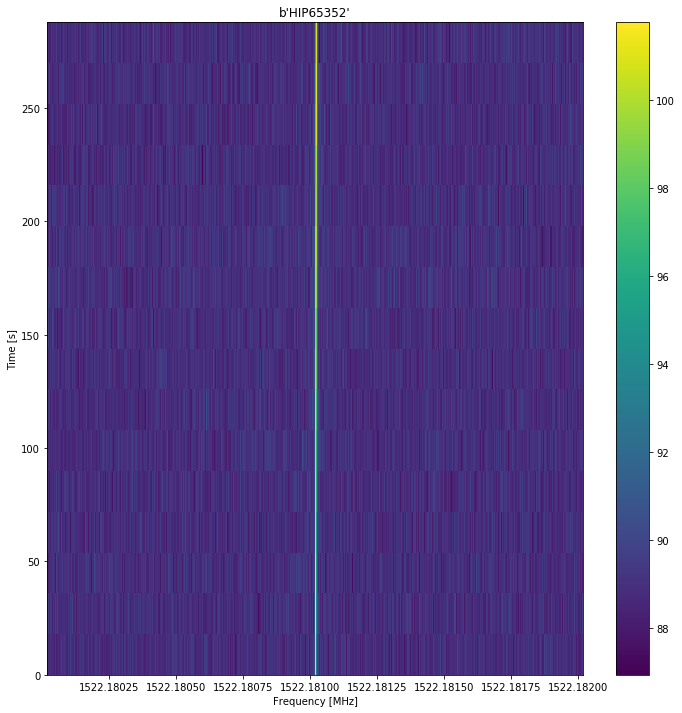

In [35]:
#https://github.com/UCBerkeleySETI/blimpy/blob/master/blimpy/waterfall.py
plt.figure(figsize=(12,12))
filterbank.plot_waterfall()

In [7]:
#from scipy.stats import signaltonoise

In [100]:
#MAX_IMSHOW_POINTS = (8192, 4096)

#dec_fac_x, dec_fac_y = 1, 1

#if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
#    dec_fac_x = int(plot_data.shape[0] / MAX_IMSHOW_POINTS[0])

#if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
#    dec_fac_y =  int(plot_data.shape[1] /  MAX_IMSHOW_POINTS[1])

#plot_data = rebin(plot_data, dec_fac_x, dec_fac_y)

In [16]:
#extent = filterbank._calc_extent(plot_f=plot_f,plot_t=filterbank.timestamps)

In [17]:
#plot_f, data_temp = filterbank.grab_data()
#A1_avg = np.mean(data_temp)
#A1_max = data_temp.max()
#A1_std = np.std(data_temp)

#print(A1_avg)
#print(A1_max)
#print(A1_std)

73878936.0
8671409000.0
60824012.0


In [31]:
#plt.colormaps(plot_data,
#   aspect='auto',
#    origin='lower',
#    rasterized=True,
#    interpolation='nearest',
#    extent=extent,
#    cmap='viridis')

#plt.colorbar()
#plt.clim(vmin=A1_avg,vmax=A1_avg+10.*A1_std);
#plt.xlabel("Frequency [MHz]")
#plt.ylabel("Time [s]")

### Generate images across the frequency range

I believe the rebin function is to prevent each image being scaled to it's local noise. That would make weak and bright signals potentially look the same. (That said, we don't want to throw away weak signals, do we?)

Question ... is the signal at 1522.18 the brightest? If not, what's going on?

### Function to find regions of interest

Get noise baseline,

blimpy.file_wrapper INFO     Skipping loading data ...
Noise baseline: 788458500.0


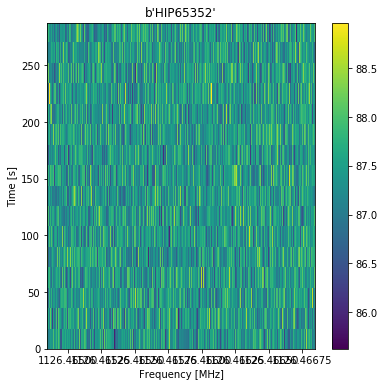

In [4]:
filterbank_head = Waterfall('D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', load_data=False)

f_range=0.002
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0
t_stop = 16
i=0

noise_slice = Waterfall('D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)

plt.figure(figsize=(6,6))
noise_slice.plot_waterfall()

noise_baseline = np.max(noise_slice.data)

print('Noise baseline: ' + str(noise_baseline))

Find regions,

In [6]:
f_range=0.3 #larger for ROI search
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0
t_stop = 16
i=0
noise_cutoff = 10
RsOI = []
max_signal = []
signal = []

while (f_stop <= filterbank_head.container.f_stop):
    ROI = 'No'
    filterbank = Waterfall('D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5', f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)
    data_temp = filterbank.data
    max_temp = np.max(data_temp)
    mean_signal = np.mean(data_temp)
    if max_temp > noise_baseline*noise_cutoff:
        RsOI.append(f_start)
        ROI = 'Yes'
        
    #min_temp = np.min(data_temp)
    #if min_temp < min_overall:
    #    min_overall = min_temp
        
    max_signal.append(max_temp)    
    signal.append(mean_signal)
    
    f_start = f_start + f_range
    f_stop = f_stop + f_range
    print("Just looked at " + str(f_start) + ". RIO? ... " + ROI)
    i=i+1
    
#print('The minimum power is ' + str(min_overall))
#print('The maximum power is ' + str(max_overall))

Just looked at 1126.76484375. RIO? ... No
Just looked at 1127.06484375. RIO? ... No
Just looked at 1127.3648437499999. RIO? ... No
Just looked at 1127.6648437499998. RIO? ... No
Just looked at 1127.9648437499998. RIO? ... Yes
Just looked at 1128.2648437499997. RIO? ... No
Just looked at 1128.5648437499997. RIO? ... No
Just looked at 1128.8648437499996. RIO? ... No
Just looked at 1129.1648437499996. RIO? ... No
Just looked at 1129.4648437499995. RIO? ... No
Just looked at 1129.7648437499995. RIO? ... No
Just looked at 1130.0648437499995. RIO? ... No
Just looked at 1130.3648437499994. RIO? ... No
Just looked at 1130.6648437499994. RIO? ... No
Just looked at 1130.9648437499993. RIO? ... Yes
Just looked at 1131.2648437499993. RIO? ... No
Just looked at 1131.5648437499992. RIO? ... No
Just looked at 1131.8648437499992. RIO? ... No
Just looked at 1132.1648437499991. RIO? ... No
Just looked at 1132.464843749999. RIO? ... No
Just looked at 1132.764843749999. RIO? ... No
Just looked at 1133.064

Just looked at 1179.564843749992. RIO? ... No
Just looked at 1179.864843749992. RIO? ... No
Just looked at 1180.1648437499919. RIO? ... No
Just looked at 1180.4648437499918. RIO? ... No
Just looked at 1180.7648437499918. RIO? ... No
Just looked at 1181.0648437499917. RIO? ... No
Just looked at 1181.3648437499917. RIO? ... No
Just looked at 1181.6648437499916. RIO? ... No
Just looked at 1181.9648437499916. RIO? ... No
Just looked at 1182.2648437499915. RIO? ... No
Just looked at 1182.5648437499915. RIO? ... No
Just looked at 1182.8648437499915. RIO? ... No
Just looked at 1183.1648437499914. RIO? ... No
Just looked at 1183.4648437499914. RIO? ... Yes
Just looked at 1183.7648437499913. RIO? ... Yes
Just looked at 1184.0648437499913. RIO? ... No
Just looked at 1184.3648437499912. RIO? ... No
Just looked at 1184.6648437499912. RIO? ... No
Just looked at 1184.9648437499911. RIO? ... No
Just looked at 1185.264843749991. RIO? ... No
Just looked at 1185.564843749991. RIO? ... No
Just looked at 

KeyboardInterrupt: 

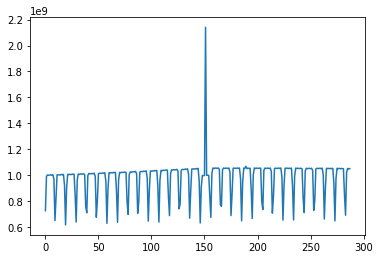

In [7]:
plt.plot(signal)

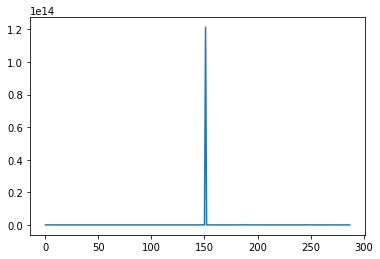

In [8]:
plt.plot(max_signal)

In [9]:
len(RsOI)

24

In [ ]:
#RsOI_min = RsOI.copy()
#RsOI_max = RsOI.copy()

#for i in range(0,len(RsOI_min)-1):
#    RsOI_max[i] = RsOI_min[i+1]

In [ ]:
#for i in range(0,len(RsOI_min)):
#    print("Between " + str(RsOI_min[i]) + " and " + str(RsOI_max[i]))
#    print((1189.77 > RsOI_min[i]) & (1189.77 < RsOI_max[i]))

### Function to plot spectrograms

In [10]:
#https://github.com/UCBerkeleySETI/blimpy/blob/master/blimpy/utils.py

def rebin(d, n_x, n_y=None):
    """ Rebin data by averaging bins together
    Args:
    d (np.array): data
    n_x (int): number of bins in x dir to rebin into one
    n_y (int): number of bins in y dir to rebin into one
    Returns:
    d: rebinned data with shape (n_x, n_y)
    """

    if d.ndim == 2:
        if n_y is None:
            n_y = 1
        if n_x is None:
            n_x = 1
        d = d[:int(d.shape[0] // n_x) * n_x, :int(d.shape[1] // n_y) * n_y]
        d = d.reshape((d.shape[0] // n_x, n_x, d.shape[1] // n_y, n_y))
        d = d.mean(axis=3)
        d = d.mean(axis=1)
    elif d.ndim == 1:
        d = d[:int(d.shape[0] // n_x) * n_x]
        d = d.reshape((d.shape[0] // n_x, n_x))
        d = d.mean(axis=1)
    else:
        raise RuntimeError("Only NDIM <= 2 supported")
    
    return(d)

In [11]:
#HIP65352 (Example Enrique data)
chosen_file = 'D:/repos_personal/other/SETI/SETI/data/spliced_blc02030405_2bit_guppi_57459_34297_HIP65352_0027.gpuspec.0000.h5'
filterbank_head = Waterfall(chosen_file, load_data=False)

f_range=0.002
#f_start = filterbank_head.container.f_start
f_start = filterbank_head.container.f_start
f_stop = f_start+f_range
t_start = 0 
t_stop = 16
i=0
MAX_IMSHOW_POINTS = (8192, 4096)

blimpy.file_wrapper INFO     Skipping loading data ...


In [12]:
#How Enrique plots his waterfall images,
#https://github.com/jeenriquez/Lband_seti/blob/master/analysis/plot_candidates.py
#i=1
#for i in range(0,len(RsOI_min)):
#while (f_stop <= filterbank_head.container.f_stop):
    #if (f_start >= RsOI_min[i]) & (f_start <= RsOI_max[i]) :
    
for i in range(0,len(RsOI)):
    f_start = RsOI[i]
    f_stop = f_start + 0.3
    filterbank = Waterfall(chosen_file, f_start=f_start, f_stop=f_stop,t_start=t_start,t_stop=t_stop)
    plot_f, data_temp = filterbank.grab_data()

    if filterbank.header[b'foff'] < 0:
            data_temp = data_temp[..., ::-1] # Reverse data
            plot_f = plot_f[::-1]

    dec_fac_x, dec_fac_y = 1, 1

    if data_temp.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = int(data_temp.shape[0] / MAX_IMSHOW_POINTS[0])

    if data_temp.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y =  int(data_temp.shape[1] /  MAX_IMSHOW_POINTS[1])

    data_temp = rebin(data_temp, dec_fac_x, dec_fac_y)

    extent = filterbank._calc_extent(plot_f=plot_f,plot_t=filterbank.timestamps)

    A1_avg = np.mean(data_temp)
    A1_max = data_temp.max()
    A1_std = np.std(data_temp)
    
    plt.figure(figsize=(12,12))
    plt.imshow(data_temp,
    aspect='auto',
    origin='lower',
    rasterized=True,
    interpolation='none',
    extent=extent,
    cmap='viridis')

    #plt.colorbar()
    plt.clim(vmin=A1_avg,vmax=A1_avg+10.*A1_std);
    #plt.clim(vmin=1e3,vmax=3.5e9);
    #plt.xlabel("Frequency [MHz]")
    #plt.ylabel("Time [s]")

    plt.axis('off') #Remove axes
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0) #Remove margins

    plt.savefig('images/outfile_' + str(f_start) + '.jpg')

    plt.clf() #Reset plots
    
    print(str(f_start) + ' (going up to ' + str(filterbank_head.container.f_stop) + ')')
    f_start = f_start + f_range
    f_stop = f_stop + f_range
    i=i+1

1127.6648437499998 (going up to 1876.46484375)
1130.6648437499994 (going up to 1876.46484375)
1133.664843749999 (going up to 1876.46484375)
1136.6648437499985 (going up to 1876.46484375)
1142.3648437499976 (going up to 1876.46484375)
1145.3648437499971 (going up to 1876.46484375)
1145.964843749997 (going up to 1876.46484375)
1148.3648437499967 (going up to 1876.46484375)
1157.0648437499954 (going up to 1876.46484375)
1160.064843749995 (going up to 1876.46484375)
1165.764843749994 (going up to 1876.46484375)
1168.7648437499936 (going up to 1876.46484375)
1169.9648437499934 (going up to 1876.46484375)
1171.7648437499931 (going up to 1876.46484375)
1183.1648437499914 (going up to 1876.46484375)
1183.4648437499914 (going up to 1876.46484375)
1195.1648437499896 (going up to 1876.46484375)
1198.1648437499891 (going up to 1876.46484375)
1199.9648437499889 (going up to 1876.46484375)
1201.1648437499887 (going up to 1876.46484375)
1203.8648437499883 (going up to 1876.46484375)
1204.164843749988

#### Combine all images

In [113]:
list_im = os.listdir('images/')
print(list_im)

['outfile_0.jpg', 'outfile_1.jpg', 'outfile_10.jpg', 'outfile_11.jpg', 'outfile_12.jpg', 'outfile_13.jpg', 'outfile_14.jpg', 'outfile_15.jpg', 'outfile_16.jpg', 'outfile_17.jpg', 'outfile_18.jpg', 'outfile_19.jpg', 'outfile_2.jpg', 'outfile_20.jpg', 'outfile_21.jpg', 'outfile_22.jpg', 'outfile_23.jpg', 'outfile_24.jpg', 'outfile_25.jpg', 'outfile_26.jpg', 'outfile_27.jpg', 'outfile_28.jpg', 'outfile_29.jpg', 'outfile_3.jpg', 'outfile_30.jpg', 'outfile_31.jpg', 'outfile_32.jpg', 'outfile_33.jpg', 'outfile_34.jpg', 'outfile_35.jpg', 'outfile_36.jpg', 'outfile_37.jpg', 'outfile_38.jpg', 'outfile_39.jpg', 'outfile_4.jpg', 'outfile_40.jpg', 'outfile_41.jpg', 'outfile_42.jpg', 'outfile_43.jpg', 'outfile_44.jpg', 'outfile_45.jpg', 'outfile_46.jpg', 'outfile_47.jpg', 'outfile_48.jpg', 'outfile_49.jpg', 'outfile_5.jpg', 'outfile_50.jpg', 'outfile_51.jpg', 'outfile_52.jpg', 'outfile_53.jpg', 'outfile_54.jpg', 'outfile_55.jpg', 'outfile_56.jpg', 'outfile_57.jpg', 'outfile_58.jpg', 'outfile_59.jpg

In [114]:
imgs = [PIL.Image.open('images/' + i) for i in list_im]

min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]
imgs_comb = np.hstack((np.asarray( i.resize(min_shape) ) for i in imgs))
imgs_comb = misc.imresize(imgs_comb, (2000, 3000)) #Resize the massive image!

imgs_comb = PIL.Image.fromarray(imgs_comb)
imgs_comb.save('HIP65352_A_1.jpg')

#### Misc

extracting integration 0...


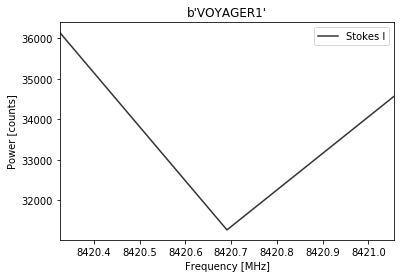

In [49]:
filterbank.plot_spectrum()

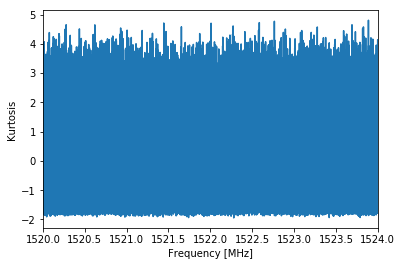

In [8]:
filterbank.plot_kurtosis()

averaging along time axis...


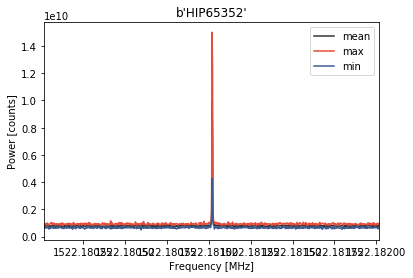

In [38]:
filterbank.plot_spectrum_min_max()

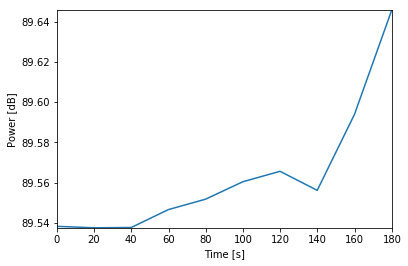

In [10]:
filterbank.plot_time_series()